# Análise dos dados do IDEB 


DISCLAIMER: THIS IS STILL WORK IN PROGRESS

Em pleno ano eleitoral, diversos candidatos aos governos estaduais e presidência da república tratram do tema Educação. É comum que candidatos usem um indicador como o IDEB para avaliar seus próprios desempenhos e de oponentes ao mesmo tempo em que propostas para melhorar esse indicador são veículadas, como construção de novas escolas, contratação de professores, etc. 
Nossa opinião é que num país de terceiro mundo como o Brasil mesmo outros fatores não diretamente ligados a educação, como violência ou renda possuem um impacto grande sobre o desempenho do IDEB e nesse notebook buscamos mensurar o impacto que fatores socio-econômicos desempenham nos resultados do IDEB estadual.


Para tal usaremos as seguintes fontes públicas:

* [Taxa de homicídio por unidade da federação - dados de 2012 a 2015](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_taxa_de_homic%C3%ADdios)
* [Taxa de extrema pobreza por unidade da federação - dados de 2010](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_incid%C3%AAncia_da_pobreza)
* [Renda per capita por unidade da federação - dados de 2017](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_renda_per_capita)
* [IDEB das Escolas Públicas (Anos Iniciais e Anos Finais) 2015](https://www.qedu.org.br/brasil/ideb/ideb-por-estados)

Idealmente deveríamos trabalhar com dados de todos os fatores como sendo do mesmo período (ano de 2015) e essa é uma melhoria que pretendemos realizar no futuro.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols, rlm
import matplotlib.pyplot as plt
%matplotlib inline

## Carrega dados

In [3]:
df = pd.read_csv('ideb2015.csv', sep='\t')
df

,UF,ESTADO,Renda,Pobreza,Homicidio,IDEB_AI,IDEB_AF
0,AC,Acre,769,0.189,45.100000,5.3,4.4
1,AL,Alagoas,658,0.205,54.466667,4.3,3.2
2,AP,Amapa,936,0.128,46.933333,4.3,3.5
3,AM,Amazonas,850,0.193,35.000000,5.0,4.2
4,BA,Bahia,862,0.177,43.833333,4.4,3.4
5,CE,Ceara,824,0.184,48.800000,5.7,4.5
6,DF,Distrito Federal,2548,0.019,23.066667,5.6,4.0
7,ES,Espirito Santo,1205,0.043,35.433333,5.5,4.1
8,GO,Goias,1277,0.037,43.300000,5.6,4.6
9,MA,Maranhao,597,0.263,33.100000,4.4,3.7


## Análise Exploratória

In [4]:
df.describe()

,Renda,Pobreza,Homicidio,IDEB_AI,IDEB_AF
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1110.185185,0.115852,36.253086,5.111111,4.007407
std,425.506398,0.075488,12.689787,0.648865,0.481125
min,597.000000,0.017000,11.266667,4.100000,3.100000
25%,840.500000,0.041000,26.300000,4.450000,3.650000
50%,937.000000,0.128000,35.000000,5.200000,4.000000
75%,1284.000000,0.181500,46.016667,5.550000,4.350000
max,2548.000000,0.263000,59.500000,6.200000,4.900000


d:\apps\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


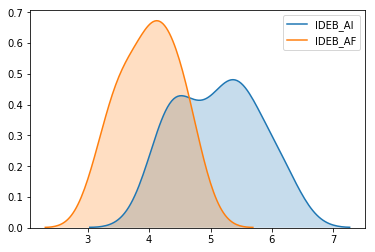

In [5]:
plt.figure()
sns.kdeplot(df["IDEB_AI"], shade=True)
sns.kdeplot(df["IDEB_AF"], shade=True)

Nota-se que a média dos dados do IDEB Anos Iniciais (IDEB AI) são superiores que a média do IDEB Anos Finais (IDEB AF). Também se nota que enquanto a distribuição das notas do IDEB_AF são próximos ao de uma curva normal simples a distribuição do IDEB_AI é bimodais.

## Vamos agora levar em consideração influência das demais variáveis no IDEB

### IDEB Anos Iniciais (IDEB_AI)

In [8]:
formula = "IDEB_AI ~ Homicidio + np.multiply(100, Pobreza) "
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IDEB_AI   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     23.59
Date:                Fri, 24 Aug 2018   Prob (F-statistic):           2.16e-06
Time:                        15:12:46   Log-Likelihood:                -11.447
No. Observations:                  27   AIC:                             28.89
Df Residuals:                      24   BIC:                             32.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.3790      0.232     27.457      0.000       5.900       6.859
Homicidio                    -0.0207      0.007     -2.866      0.009      -0.036      -0.006
np.multiply(100, Pobreza)    -0.0448      0.012     -3.691      0.001      -0.070      -0.020
==============================================================================
Omnibus:                       10.302   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.681
Skew:                           1.167   Prob(JB):                       0.0130
Kurtosis:                       4.506   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Percebe-se que esse simples modelo surpreendentemente explica aproximadamente $2/3$ da variância dos dados do IDEB_AI ($R^2=0.663$ e Adjusted $R^2=0.635$ ) 

### IDEB Anos Finais (IDEB_AF)

In [9]:
formula = "IDEB_AF ~  Homicidio + np.multiply(100, Pobreza)"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IDEB_AF   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     12.63
Date:                Fri, 24 Aug 2018   Prob (F-statistic):           0.000179
Time:                        15:17:08   Log-Likelihood:                -8.3428
No. Observations:                  27   AIC:                             22.69
Df Residuals:                      24   BIC:                             26.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.9151      0.207     23.734      0.000       4.488       5.343
Homicidio                    -0.0184      0.006     -2.865      0.009      -0.032      -0.005
np.multiply(100, Pobreza)    -0.0207      0.011     -1.915      0.067      -0.043       0.002
==============================================================================
Omnibus:                        5.798   Durbin-Watson:                   2.625
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                4.305
Skew:                           0.959   Prob(JB):                        0.116
Kurtosis:                       3.385   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Percebe-se que novamente esse simples modelo explica praticamente metade da variância dos dados do IDEB_AI ($R^2=0.513$ e Adjusted $R^2=0.472$ ) 

## Conclusão

A análise realizada aqui nos fornece evidências que o impacto de fatores sócio-econômicos possuem num indicador como o IDEB dentro das unidades da federação Brasileira. Esses impactos podem ser até mesmo maiores que os fatores diretamente ligados a educação, principalmente nos anos iniciais.